In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [160]:
df=pd.read_csv('/content/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [161]:
df=df.drop(['Position'],axis=1)
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [162]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

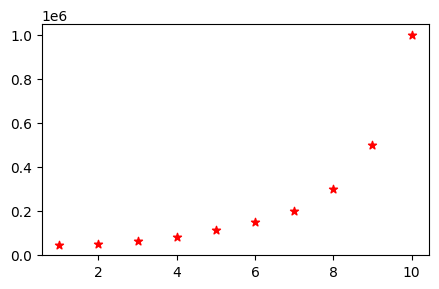

In [163]:
plt.figure(figsize=(5,3))
plt.scatter(x=x,y=y,color='r',marker='*')
plt.show()

In [164]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [165]:
reg.coef_

array([80878.78787879])

In [166]:
reg.intercept_

np.float64(-195333.33333333337)

In [167]:
predictions=reg.predict(x)
predictions

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

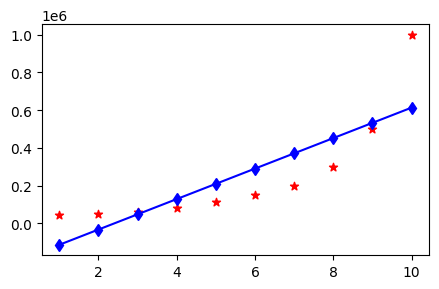

In [168]:
plt.figure(figsize=(5,3))
plt.scatter(x=x,y=y,color='r',marker='*')
plt.plot(x,predictions,color='b',marker='d')
plt.show()

polynomial process

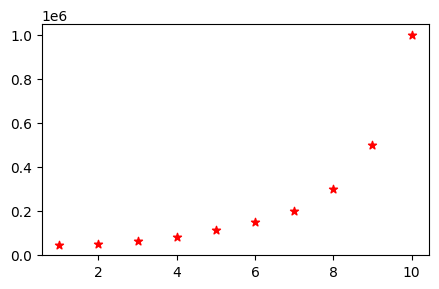

In [169]:
plt.figure(figsize=(5,3))
plt.scatter(x=x,y=y,color='r',marker='*')
plt.show()

In [170]:
from sklearn.preprocessing import PolynomialFeatures
ploy=PolynomialFeatures(degree=2)
ploy.fit(x)

PolynomialFeatures()

In [171]:
poly_res=ploy.transform(x)

In [172]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [173]:
poly_res

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [174]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(poly_res,y)

LinearRegression()

In [175]:
predictions=reg.predict(poly_res)

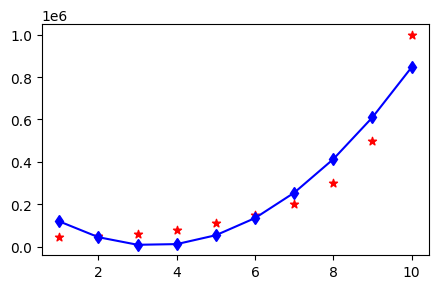

In [176]:
plt.figure(figsize=(5,3))
plt.scatter(x=x,y=y,color='r',marker='*')
plt.plot(x,predictions,color='b',marker='d')
plt.show()

#r2 score vs Adjusted r2 score

#case 1

In [177]:
df=pd.read_csv('/content/case_1.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [178]:
x=df[['YearsExperience']]
y=df['Salary']

In [179]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [180]:
print(f'{reg.coef_} * X + {reg.intercept_}')

[6853.4545736] * X + 32537.52840117628


In [181]:
ans=reg.predict(x)

In [182]:
from sklearn.metrics import r2_score
print(f'r2 acc {r2_score(y,ans)}')

r2 acc 0.7020755183418668


In [183]:
x.shape[1]

1

In [184]:
value=1-( (1-r2_score(y,ans))* (len(df)-1) ) / (len(df)-x.shape[1]-1)
print(f'adjusted r2 acc {value}')

adjusted r2 acc 0.6791582505220104


#case 2

In [185]:
df=pd.read_csv('/content/case_2.csv')
df

,YearsExperience,Salary,Height
0,1.1,39343.0,1.47
1,1.3,46205.0,1.50
2,1.5,37731.0,1.52
3,2.0,43525.0,1.55
4,2.2,39891.0,1.57
5,2.9,56642.0,1.60
6,3.0,60150.0,1.63
7,3.2,54445.0,1.65
8,3.2,64445.0,1.68
9,3.7,57189.0,1.70


In [186]:
x=df[['YearsExperience','Height']]
y=df['Salary']

In [187]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [188]:
print(f'{reg.coef_} * X + {reg.intercept_}')

[ 14644.63233411 -77180.11347421] * X + 136770.40050132194


In [189]:
ans=reg.predict(x)

In [190]:
from sklearn.metrics import r2_score
print(f'r2 sco {r2_score(y,ans)}')

r2 sco 0.7388592596500807


In [191]:
x.shape[1]

2

In [192]:
value=1-((1-r2_score(y,ans))* (len(df)-1)) / (len(df)-x.shape[1]-1)
print(f'adjusted r2 score {value}')

adjusted r2 score 0.6953358029250942


#Regularization

In [193]:
df=pd.read_csv('/content/kc_house_data.csv')
df = df.drop(['id','date'],axis=1)
x = df.iloc[: , 1:]
y = df.iloc[: , 1]


In [194]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [195]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [196]:
a=reg.coef_
a

array([ 1.00000000e+00, -3.16643016e-16, -6.04831823e-13,  7.74867889e-19,
        1.85308953e-17,  7.79290646e-17,  9.85709303e-17, -1.26241403e-16,
        3.16380580e-17,  6.04829745e-13,  6.04832750e-13,  6.52467336e-16,
       -2.91155749e-18,  1.07018950e-16, -8.91940214e-17,  2.24235303e-16,
       -6.58274355e-18, -1.49470796e-18])

In [203]:
t = pd.DataFrame()
t['Column_Names'] = x.columns
t['m_val']=reg.coef_

In [204]:
t

,Column_Names,m_val
0,bedrooms,1.000000e+00
1,bathrooms,-3.166430e-16
2,sqft_living,-6.048318e-13
3,sqft_lot,7.748679e-19
4,floors,1.853090e-17
5,waterfront,7.792906e-17
6,view,9.857093e-17
7,condition,-1.262414e-16
8,grade,3.163806e-17
9,sqft_above,6.048297e-13


In [199]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(x,y)

Ridge()

In [200]:
t['ridge_val']=ridge_reg.coef_
t

,Column_Names,m_val,ridge_val
0,bedrooms,1.000000e+00,9.999116e-01
1,bathrooms,-3.166430e-16,2.977928e-05
2,sqft_living,-6.048318e-13,3.976577e-08
3,sqft_lot,7.748679e-19,-5.926824e-11
4,floors,1.853090e-17,-4.575646e-06
5,waterfront,7.792906e-17,-3.609136e-05
6,view,9.857093e-17,-7.418023e-06
7,condition,-1.262414e-16,3.880888e-06
8,grade,3.163806e-17,-1.299281e-05
9,sqft_above,6.048297e-13,1.280652e-08


In [201]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(x,y)

Lasso()

In [202]:
t['lasso_val']=las.coef_
t

,Column_Names,m_val,ridge_val,lasso_val
0,bedrooms,1.000000e+00,9.999116e-01,0.000000e+00
1,bathrooms,-3.166430e-16,2.977928e-05,0.000000e+00
2,sqft_living,-6.048318e-13,3.976577e-08,6.374610e-04
3,sqft_lot,7.748679e-19,-5.926824e-11,-7.085412e-07
4,floors,1.853090e-17,-4.575646e-06,-0.000000e+00
5,waterfront,7.792906e-17,-3.609136e-05,-0.000000e+00
6,view,9.857093e-17,-7.418023e-06,-0.000000e+00
7,condition,-1.262414e-16,3.880888e-06,0.000000e+00
8,grade,3.163806e-17,-1.299281e-05,-0.000000e+00
9,sqft_above,6.048297e-13,1.280652e-08,-0.000000e+00
